In [2]:
#출처 : ibm 커뮤니티 데이터
#community.ibm.com/accelerators
#통신사 고객관리 데이터셋
import pandas as pd
df=pd.read_csv('test3.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
print(df.shape)

(7043, 21)


# Business Understanding
- 통신사 고객관리
- 여기서 원하는게 뭘까? 
>고객 유치에 효과적인 방법, 기존 고객 유지
- 통신사는 고객과의 약정을 통해 정기적인 현금의 흐름을 만들어냄
- 중요한것은?
>고객의 인원수->수익으로 직결
>신규고객의 유치(유입), 기존고객의 유지
- Chum - 고객이탈
- 고객이탈과 가장 연관성있는 요인은?
- 타겟 고객층 설정, 설득요인 설정
- Clustering(군집화)를 통해 타겟층 군집화

# Data Understanding
- 

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
len(set(df['customerID']))
#7043개 아이디,(고객의 식별정보) 겹치지 않음

7043

In [6]:
set(df['gender'])#성별

{'Female', 'Male'}

In [7]:
set(df['SeniorCitizen'])#노인여부


{0, 1}

'Partner' - 동반자, 
'Dependents' - 부양가족,
'tenure' - 이용기간(개월), 
'PhoneService' - 이용 서비스, 
'MultipleLines' - 다중회선 이용여부, 
'InternetService' - 인터넷 서비스 종류,
'OnlineSecurity' - 인터넷 보안 서비스 사용 여부, 
'OnlineBackup' - 인터넷 보험 여부, 
'DeviceProtection' - 단말기 보험,
'TechSupport' - 기술지원 서비스,
'StreamingTV' - 서비스 여부, 
'StreamingMovies' - 서비스 여부 , 
'Contract' - 갱신 주기, 
'PaperlessBilling' - 전자청구서 여부,
'PaymentMethod' - 결제 수단, 
'MonthlyCharges' - 월별 청구금액, 
'TotalCharges' - 총 청구금액, 
'Churn' - 이탈 여부

In [8]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [9]:
df.describe()#수치통계
#숫자형 데이터가 더 있어야 할것 같은데 없음
#토탈차지 왜 안나왔을가
#dtype이 object라서 
#왜 object임?
#

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
set(df['TotalCharges'])
#문자열로 저장되어 있음
#len해보면 7043개 중 6531가지 있다고 나옴
#

{'3775.85',
 '2790.65',
 '678.8',
 '68.95',
 '113.85',
 '6435.25',
 '101.65',
 '109.6',
 '1565.7',
 '6096.45',
 '1316.9',
 '1798.65',
 '7752.3',
 '1414.8',
 '6889.8',
 '6637.9',
 '1424.6',
 '795.15',
 '2029.05',
 '1558.7',
 '933.3',
 '7133.25',
 '3419.5',
 '6314.35',
 '1500.95',
 '349.65',
 '2053.05',
 '5941.05',
 '4469.1',
 '4965.1',
 '7386.05',
 '317.75',
 '141.7',
 '2698.35',
 '1725.4',
 '1513.6',
 '693.45',
 '82.15',
 '5883.85',
 '317.25',
 '639.65',
 '540.95',
 '1520.1',
 '7317.1',
 '2460.55',
 '814.75',
 '702.9',
 '20.55',
 '1776.55',
 '7751.7',
 '780.2',
 '6375.8',
 '8058.55',
 '4018.05',
 '1664.3',
 '4065',
 '246.5',
 '24.45',
 '7559.55',
 '943.1',
 '6373.1',
 '5067.45',
 '378.6',
 '2572.95',
 '229.5',
 '677.05',
 '294.2',
 '365.8',
 '1282.85',
 '1461.15',
 '1505.05',
 '314.6',
 '1626.4',
 '3078.1',
 '1097.15',
 '1209.25',
 '281',
 '6991.9',
 '1114.85',
 '3263.6',
 '1799.3',
 '144.55',
 '5720.35',
 '903.8',
 '655.9',
 '5953',
 '5784.3',
 '118.5',
 '4615.25',
 '3478.75',
 '6362.

In [11]:
df.sort_values(by='TotalCharges')['TotalCharges']
#object라서 안됨
#띄어쓰기로 저장되어 있는 데이터 존재
#빈칸 데이터 존재
#빠진 데이터 있으면 의미없는 데이터 나올 가능성 있음

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

## 빈값 처리 방법
- 그냥 지우기(데이터 셋이 클때, 삭제된 데이터의 비율이 작아서 상관 ㄴ
- 도메인 지식(가장 좋은 방법, 도메인에 대한 지식이 높을때, 적절한 논리적인 근거와 패턴을 가지고 추측)
- 평균 대체법(숫자일 경우, 평균으로 대체, 경우의 수일 경우, other로 처리)
- 해당 column을 label로 두고 ML이 학습해서 predict로 빈 값을 채워넣기


In [12]:
#빈칸의 개수 파악
df.loc[df['TotalCharges']==' ']
#11개 빈칸
#영향 없을듯
#하지만 7043개 데이터는 이미 적으므로 다른방식
#도메인 지식으로 채워넣을수 있지 않을까? 대표성 있는 컬럼을 찾아 채워야함
#개월수 * 월별 요금

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### SeniorCitizen은 대표성이 있는가?
- 기술통계값을 보았을때 x
- 0or1의 값, 0이 많음, 16%만 1이었음
#### Dependents는?
- dependents가 yes인지
- 상관 ㄴ
#### Tenure는?
- tenure가 0인지
- 빈칸개수와 동일
- 상관 o

In [13]:
df.loc[df['Dependents']=='Yes']
#2110개, 30%정도가 yes 애매
##dependents 대표성 여부

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [14]:
print(2110/7043)

0.2995882436461735


In [15]:
df.loc[df['tenure']==0]
#11개 TotalCharge의 빈칸개수와 동일
# tenure가 0이면 TotalCharges가 0
#서비스 이용기간이 1개월 미만이라 당연히 총 청구금액이 0

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


## 집합 이용
- 교집합, 차, PK키(CustomerID)를 이용
- TotalCharges가 

In [16]:
tc_null=df.loc[df['TotalCharges']==' ']['customerID'].values
#values를 넣어 리스트로 출력

In [17]:
te_null=df.loc[df['tenure']==0]['customerID'].values

In [18]:
tc_null=set(df.loc[df['TotalCharges']==' ']['customerID'].values)
#values를 넣어 리스트로 출력

In [19]:
te_null=set(df.loc[df['tenure']==0]['customerID'].values)

In [20]:
tc_null.difference(te_null)
#차의 결과 - 차집합 -difference
#차=0

set()

In [21]:
print(len(tc_null.difference(te_null)))
print(len(te_null.difference(tc_null)))
#서비스 이용기간이 1개월 미만이라 당연히 총 청구금액이 0
#totalCharges가 빈칸인 row는 0으로 저장해도 되겠다

0
0


In [22]:
df.loc[df['tenure']==0, 'TotalCharges']=0

df['TotalCharges']=df['TotalCharges'].apply(lambda x: float(x))
#object 자료형을 float로 변환
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
set(df['Churn'])

{'No', 'Yes'}

In [24]:
df['Churn_num']=df['Churn'].map({'Yes':1, 'No':0})

In [25]:
df.describe()
#평균치로 확률 확인
#고객이탈이 발생한 경우 26%정도


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


어떤경우에 이탈하는가 확인이 목적
회귀/분류? 분류문제
분류문제 평가지표는 무엇이 있던가?
클래스 인밸런스 이슈 -> accuracy보단 prec, recall 이용

# Data Exploration


In [26]:
set(df['tenure'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72}

In [27]:
import numpy as np
te_ch=df.groupby('tenure').agg({'Churn_num':np.mean}).reset_index()
#기간별 이탈율

<AxesSubplot:xlabel='tenure', ylabel='Churn_num'>

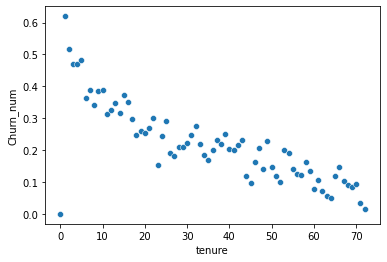

In [28]:
import seaborn as sns
sns.scatterplot(data=te_ch, x='tenure', y='Churn_num')
#개월수가 길수록 이탈률 낮음

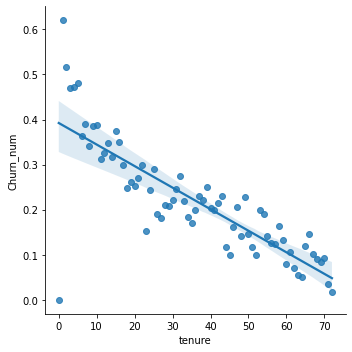

In [29]:
sns.lmplot(data=te_ch, x='tenure', y='Churn_num')
#추세선
#개월수가 길수록 이탈률 낮음

In [30]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

In [31]:
hue='Dependents'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
te_ch

,tenure,Dependents,Churn_num
0,0,Yes,0.000000
1,1,No,0.632613
2,1,Yes,0.557692
3,2,No,0.538095
4,2,Yes,0.357143
...,...,...,...
140,70,Yes,0.063830
141,71,No,0.038095
142,71,Yes,0.030769
143,72,No,0.020000


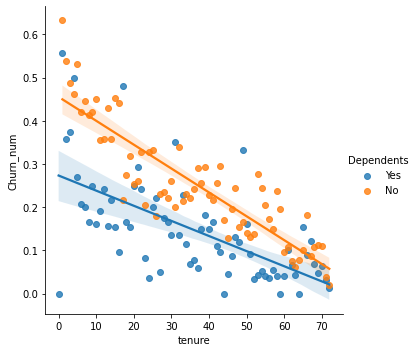

In [32]:
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#부양가족이 있는 경우가 아닌 경우보다 이탈율이 낮다

In [33]:
df.describe(include='object')
#top - 빈도가 더 높은값(남자)
#freq - 빈도 (남자의 수)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


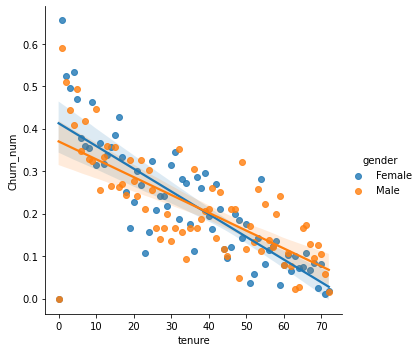

In [34]:
hue='gender'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
# 성별은 이탈율과 관련이 거의 없다

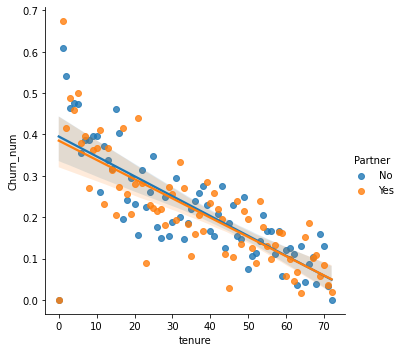

In [35]:
hue='Partner'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#동거인의 여부는 이탈율과 관련이 거의 없다

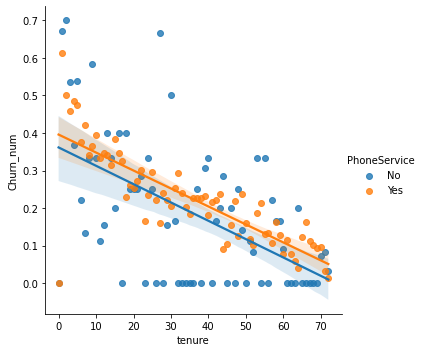

In [36]:
hue='PhoneService'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#보험이 있는 경우가 아닌 경우보다 이탈율이 아주 조금 높다

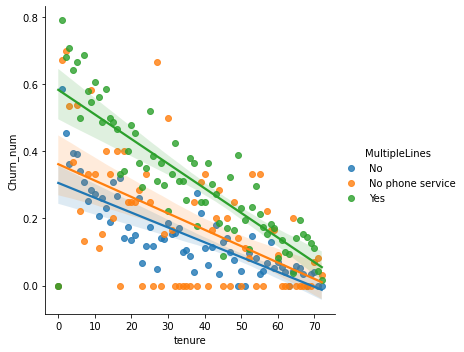

In [37]:
hue='MultipleLines'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#다중회선을 사용하는 경우가 다른 경우보다 이탈율의 시간에 따른 증감폭이 크다
#다중회선을 사용하는 경우, 사용기간이 짧을 경우의 이탈율이 크다

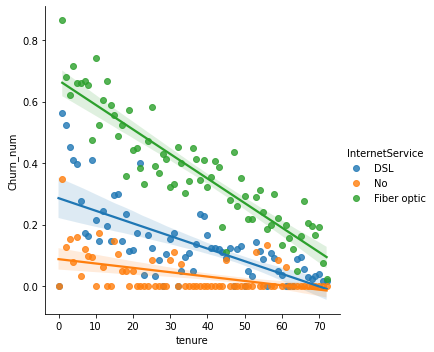

In [38]:
hue='InternetService'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#fiber optic을 사용하는 경우가 다른 경우보다 이탈율의 시간에 따른 증감폭이 크다
#fiber optic을 사용하는 경우, 사용기간이 짧을 경우의 이탈율이 크다
#fiber optic, DSL, 사용안함의 순으로 기울기에 차이가 있다
#DSL의 초기 편차가 크다

#fiber optic - 광섬유 통신 - 빠름
#DSL - 옛날방식 통신 - 느림

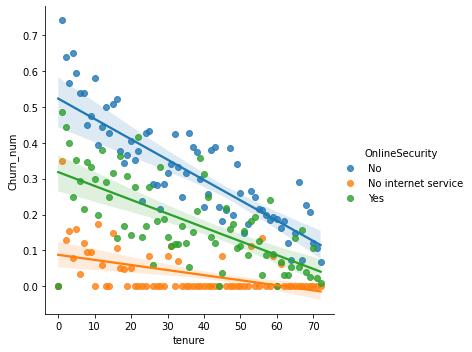

In [39]:
hue='OnlineSecurity'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#보안을 사용하지 않는 경우가 다른 경우보다 이탈율의 시간에 따른 증감폭이 크다
#보안을 사용하지 않는 경우, 사용기간이 짧을 경우의 이탈율이 크다
#보안을 사용하는 경우가 보안을 사용하지 않는 경우보다 이탈율이 낮다
#보안을 사용하는 경우와 아닌경우 모두 초기편차가 크다
#보안 사용안함, 보안 사용, 인터넷 서비스 사용안함의 순으로 기울기에 차이가 있다


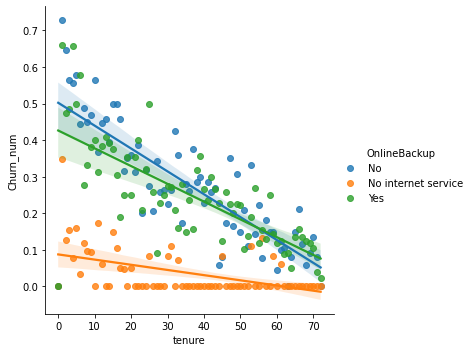

In [40]:
hue='OnlineBackup'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#의미없다

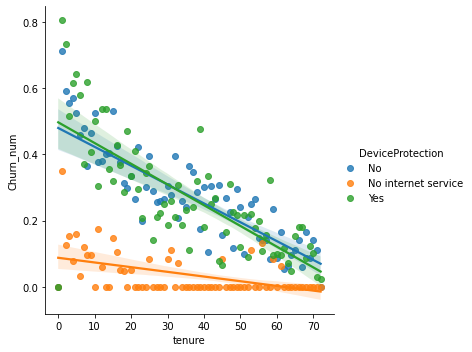

In [41]:
hue='DeviceProtection'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#의미없다

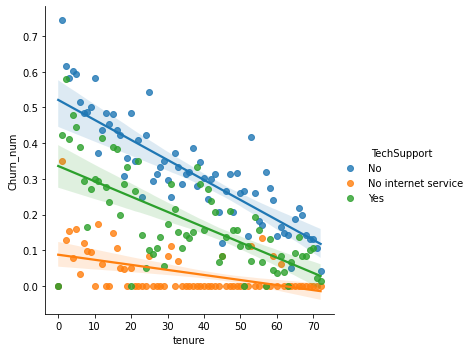

In [42]:
hue='TechSupport'
       
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

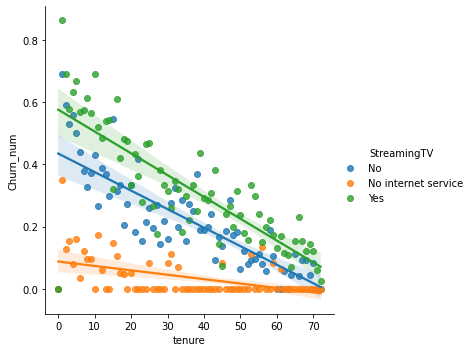

In [43]:
hue='StreamingTV'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

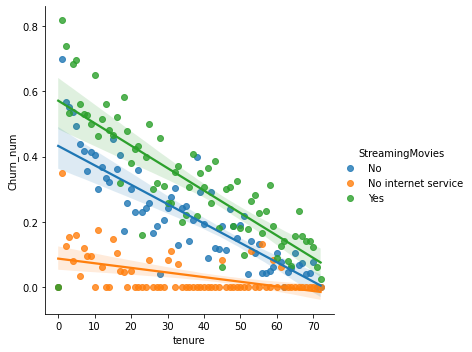

In [44]:
hue='StreamingMovies'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

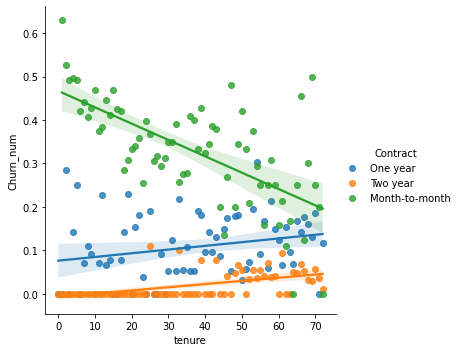

In [45]:
hue='Contract'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#흥미롭다
#갱신주기가 1년인 경우 이탈율이 시간이 지날수록 높다
#다른 그래프와 다른 양상을 보인다
#2년의 경우에도 증가하는 추세를 보인다
#반면 매달 갱신되는 경우는 다른 그래프와 비슷하다


#따라서 갱신 주기가 짧을 수록 기간에 따른 이탈율이 높아진다고는 할 수 없지만 
#연 단위에서는 해당된다고 할수있다
#연 단위 갱신에서는 초기 이탈율이 낮다

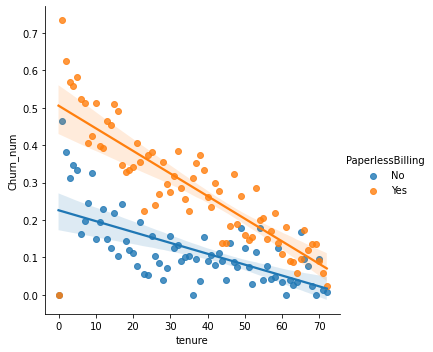

In [46]:
hue='PaperlessBilling'
       
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

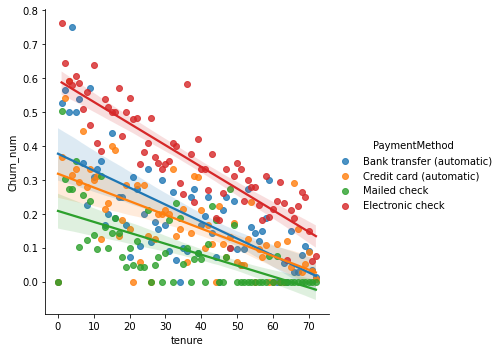

In [47]:
hue='PaymentMethod'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#경사 - elec, bank=credit, mail

#bank - 자동이체
#credit - 신용카드
#mail - 우편
#elec - 지로통지서

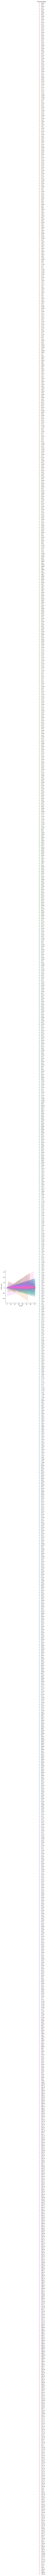

In [48]:
hue='MonthlyCharges'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

In [49]:
hue='TotalCharges'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000276C8815700> (for post_execute):


KeyboardInterrupt: 

## 공통 특징
- tenure가 높아질수록 churn_num이 낮아진다
## 고객정보 기반 특징
## 서비스 종류 기반 특징
## 계약정보 기반 특징

In [ ]:
upper_lim=desc['mean']+(2.5*desc['std'])

In [50]:
#monthileCharges, TotalChargs도 min-max scaling하세요

scal_col=['tenure', 'MonthlyCharges', 'TotalCharges']

for tgt_col in scal_col:
    minus_min=df[tgt_col]-np.min(df[tgt_col])#평균으로 빼기
    df[tgt_col+'_mmscal']=minus_min/np.max(minus_min)#표준편차로 나누기
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_mmscal,MonthlyCharges_mmscal,TotalCharges_mmscal
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599,0.462803,0.262497
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104,0.299403,0.261007
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000,0.171642,0.045891
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778,0.518408,0.160574
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889,0.712438,0.436003
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [52]:
for tgt_col in scal_col:
    minus_min=df[tgt_col]-np.mean(df[tgt_col])#평균으로 빼기
    df[tgt_col+'_mmscal']=minus_min/np.std(minus_min)#표준편차로 나누기
df.describe()
#평균값(tenure_std_scal)이 0이 되길 원했으나 아님 -> 0에 근접한 숫자, 0에 수렴

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_mmscal,MonthlyCharges_mmscal,TotalCharges_mmscal
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,-4.066982e-17,-1.513422e-15,-1.635494e-15
std,0.368612,24.559481,30.090047,2266.794470,0.441561,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,0.000000,18.250000,0.000000,0.000000,-1.318165e+00,-1.545860e+00,-1.005780e+00
25%,0.000000,9.000000,35.500000,398.550000,0.000000,-9.516817e-01,-9.725399e-01,-8.299464e-01
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,-1.372744e-01,1.857327e-01,-3.905282e-01
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,9.214551e-01,8.338335e-01,6.648034e-01
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.613701e+00,1.794352e+00,2.825806e+00


## 경우의 수 column 변환 과정

In [53]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [56]:
yes_no_col=['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for tgt in yes_no_col:
    mapper={'No':0, 'Yes':1}
    df[tgt+'_num']=df[tgt].map(mapper)
    
#바꾸는거 아니고 [칼럼명]+_num으로 저장
#map {} 기능

In [57]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Churn_num,tenure_mmscal,MonthlyCharges_mmscal,TotalCharges_mmscal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,0,-1.277445,-1.160323,-0.992611,1,0,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.50,No,0,0.066327,-0.259629,-0.172165,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,Yes,1,-1.236724,-0.362660,-0.958066,0,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.75,No,0,0.514251,-0.746535,-0.193672,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.65,Yes,1,-1.236724,0.197365,-0.938874,0,0,1,1


In [58]:
set(df['InternetService'])
#인터넷 속도 빠른 순 -> F, D, No 순서 : 도메인 지식
#속도에 따른 차이 비교 위해 숫자로 설정
#느린 순으로 0, 0.5, 1

{'DSL', 'Fiber optic', 'No'}

In [59]:
mapper={'No':0, 'DSL':0.5, 'Fiber optic':1}
df['InternetSpeed']=df['InternetService'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_mmscal,MonthlyCharges_mmscal,TotalCharges_mmscal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,-4.066982e-17,-1.513422e-15,-1.635494e-15,0.483033,0.299588,0.903166,0.592219,0.611458
std,0.368612,24.559481,30.090047,2266.794470,0.441561,1.000071e+00,1.000071e+00,1.000071e+00,0.499748,0.458110,0.295752,0.491457,0.389438
min,0.000000,0.000000,18.250000,0.000000,0.000000,-1.318165e+00,-1.545860e+00,-1.005780e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,-9.516817e-01,-9.725399e-01,-8.299464e-01,0.000000,0.000000,1.000000,0.000000,0.500000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,-1.372744e-01,1.857327e-01,-3.905282e-01,0.000000,0.000000,1.000000,1.000000,0.500000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,9.214551e-01,8.338335e-01,6.648034e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.613701e+00,1.794352e+00,2.825806e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
df.describe().columns
#tenure, tenure_mm_scal, mCharge, totalC_mm_scal, tenure, mC, TC_mmscal,_mm_scal 

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_num', 'tenure_mmscal', 'MonthlyCharges_mmscal',
       'TotalCharges_mmscal', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed'],
      dtype='object')

In [90]:
Interested=['SeniorCitizen', 'TotalCharges',
       'Churn_num', 'tenure_mmscal', 'MonthlyCharges_mmscal',
       'TotalCharges_mmscal', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']
df[Interested].to_csv('test3_modify.csv', index=False)

In [91]:
df=pd.read_csv('test3_modify.csv')
df.head()

,SeniorCitizen,TotalCharges,Churn_num,tenure_mmscal,MonthlyCharges_mmscal,TotalCharges_mmscal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
0,0,29.85,0,-1.277445,-1.160323,-0.992611,1,0,0,1,0.5
1,0,1889.50,0,0.066327,-0.259629,-0.172165,0,0,1,0,0.5
2,0,108.15,1,-1.236724,-0.362660,-0.958066,0,0,1,1,0.5
3,0,1840.75,0,0.514251,-0.746535,-0.193672,0,0,0,0,0.5
4,0,151.65,1,-1.236724,0.197365,-0.938874,0,0,1,1,1.0


In [93]:
label='Churn_num'
features=['SeniorCitizen', 'tenure_mmscal', 'MonthlyCharges_mmscal',
       'TotalCharges_mmscal', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']

In [94]:
df.columns

Index(['SeniorCitizen', 'TotalCharges', 'Churn_num', 'tenure_mmscal',
       'MonthlyCharges_mmscal', 'TotalCharges_mmscal', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed'],
      dtype='object')

In [95]:
x, y=df[features], df[label]

# Modeling
- 교차검증


## Cross Validation
- 학습된 데이터가 적을때 교차검증을 통해 안정적인 점수 획득을 노린다

>데이터 3등분, 3덩이 데이터, trian, train, test로 분류<br>
>데이터 3등분, train, test, train데이터로 분류<br>
>데이터 3등분, test, train, train 로 분류
- 3번 테스트 후, 검증 점수의 평균으로 최종 검증점수 얻기
### 교차검증에서 중요한것
- k등분(보통은 5등분)
- k-fold-Cross Validation


### Cross Validation 순서
1. row순서를 섞음
2. 데이터셋을 k등분함 (k-fold-CV)
3. 첫번째 데이터 셋을 test용으로 사용, 나머지를 train용으로 사용
4. train으로 학습, test채점해서 점수 확인
5. 두번째 데이터 셋을 test용으로 사용, 나머지를 train용으로 사용
6. 3, 4단계를 k번 반복
7. 평가지표 점수가 k개 발생
8. 평균(CV-score)


In [96]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rf



In [97]:
model=rf()
cvs(model, x, y, cv=5, scoring='precision')

array([0.58223684, 0.61016949, 0.57620818, 0.59866221, 0.62913907])

cvs(
    estimator,-> 알고리즘 모델
    X,
    y=None,->x, y값
    *,
    groups=None,
    scoring=None,-> 어떤 평가지표 사용?(accuracy, prec,..)
    cv=None,-> 몇등분할거?(default=5)
    n_jobs=None,-> 컴터 자원 다 사용?
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)

In [98]:
np.mean(cvs(model, x, y, cv=5, scoring='precision'))

0.5963693775681121

# supervised learning(지도학습)
- 정답이 있는 데이터로 학습하는 방식
- feature와 label관계 패턴을 학습
- classfication(분류), regression(회귀)구분할수 있어야 함
- 


# unsupervised learing(비지도 학습)
- 정답이 없는 데이터로 학습하는 방식
- feature간 관계 패턴을 학습
- 비지도 학습의 알고리즘들은 목적이 정해져 있음
- clustering(군집화), dimensionality reduction(차원축소)

# 군집 알고리즘
- 데이터를 여러개의 그룹으로 묶는 것
- 

In [99]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=4)
#n_clusters-> 군집 개수
model.fit(x)

KMeans(n_clusters=4)

In [100]:
model.labels_
#각 row가 어떤 그룹에 속하는 지 

array([3, 1, 3, ..., 3, 0, 2])

In [101]:
df['cluster']=model.labels_
df.head()

,SeniorCitizen,TotalCharges,Churn_num,tenure_mmscal,MonthlyCharges_mmscal,TotalCharges_mmscal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed,cluster
0,0,29.85,0,-1.277445,-1.160323,-0.992611,1,0,0,1,0.5,3
1,0,1889.50,0,0.066327,-0.259629,-0.172165,0,0,1,0,0.5,1
2,0,108.15,1,-1.236724,-0.362660,-0.958066,0,0,1,1,0.5,3
3,0,1840.75,0,0.514251,-0.746535,-0.193672,0,0,0,0,0.5,1
4,0,151.65,1,-1.236724,0.197365,-0.938874,0,0,1,1,1.0,0


In [102]:
df.groupby('cluster').agg({label:np.mean})
#기준과 각 그룹별 평균
#그룹별 이탈율
#가장 높은 그룸 ->0
#가장 낮은 그룹 ->1, 
#낮->높 순서 ->1230

,Churn_num
cluster,
0,0.495247
1,0.050804
2,0.152991
3,0.241497


In [106]:
np.mean(df[label])
#전체 이탈율

0.2653698707936959

In [107]:
df.loc[df['cluster']==1][features].describe().T['mean'].reset_index()

,index,mean
0,SeniorCitizen,0.076207
1,tenure_mmscal,0.854841
2,MonthlyCharges_mmscal,-0.976684
3,TotalCharges_mmscal,-0.189417
4,Partner_num,0.664691
5,Dependents_num,0.467401
6,PhoneService_num,0.749365
7,PaperlessBilling_num,0.389500
8,InternetSpeed,0.227350


In [108]:
#이탈율 가장 낮은 그룹의 feature평균 데이터 출력
for_plot=df.loc[df['cluster']==1][features].describe().T['mean'].reset_index()
#고객을 선별하여 각 feature들의 평균을 구함
#그룹의 특징이라고 하고, cluster_mean이라 함

#이탈율이 가장 낮은 그룹의 특징 확인

<AxesSubplot:xlabel='mean', ylabel='index'>

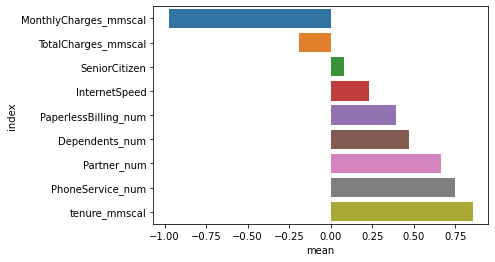

In [109]:
import seaborn as sns
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index')

In [110]:
#이탈율 가장 높은 그룹의 feature평균 데이터 출력
for_plot=df.loc[df['cluster']==0][features].describe().T['mean'].reset_index()

<AxesSubplot:xlabel='mean', ylabel='index'>

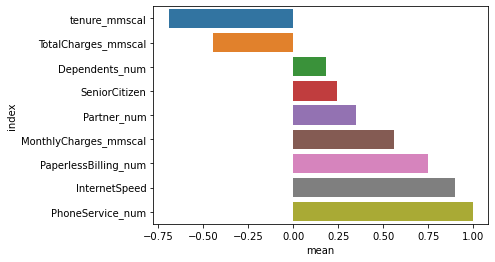

In [111]:
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index')

# 차원 축소
- 주성분 분석(PCA:Principal Component analysis) - 대표적인 차원축소 알고리즘
- feature의 개수 줄이는 것 
- 중요도를 보고 주성분을 선택하는 것이 feature selection
- 하지만 차원 축소는 feature를 줄이는 것이기 때문에 다름
- 차원축소를 하면 feature가 더이상 feature의 의미를 갖지 않음
> ex) 식당에서 식재료 <br>
> 식재료가 100개, 메뉴에 사용된 식재료<br>
> 식재료 column, 주문 1회가 row<br>
> 이때 PCA -> 식재료의 사용량이 DataFrame<br>
> 전체 주문의 90%가 bestseller2메뉴라면, 식재료 100개가 아니라 메뉴 2개의 컬럼으로 90%의 주문데이터 설명 가능<br>
> 재료가 아닌 메뉴로 보아 차원 축소


In [112]:
from sklearn.decomposition import PCA


In [114]:
model=PCA(n_components=2)

PCA(
    n_components=None,->차원축소 개수
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)

In [115]:
pd.DataFrame(model.fit_transform(df[features]), columns=['PC1', 'PC2'])

,PC1,PC2
0,-1.873445,0.004038
1,-0.327483,0.231493
2,-1.519566,-0.730295
3,-0.369113,0.874200
4,-1.158890,-1.262062
...,...,...
7038,0.146538,-0.500753
7039,3.114258,0.297675
7040,-1.549075,0.420332
7041,-0.859372,-1.217312


In [117]:
#pc1, 2가 얼마나 사용되었는지 확인 가능
pd.DataFrame(model.components_, columns=features)
#0=pc1 : 각 컬럼의 수치의 합
#pc1=(0.035346	*	SeniorCitizen)+...(수치* column count)


,SeniorCitizen,tenure_mmscal,MonthlyCharges_mmscal,TotalCharges_mmscal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
0,0.035346,0.540816,0.496463,0.648400,0.114750,0.017706,0.028198,0.073358,0.140400
1,-0.089284,0.574819,-0.677035,0.102741,0.163454,0.162249,-0.057789,-0.201781,-0.309163


### PCA 수학적 설명
- column끼리 공분산 행렬을 구함 : cov()
- 공분산 행렬 : 공분한 행렬 : 가로와 세로의 길이가 같은 행렬
- 고유값, 고유 벡터를 정방행렬에서 뽑아낼수 있음
- 고유값의 크기 순으로 정렬할 수 있음
- 이때, 크기가 가장 큰 고유값으로부토 정렬하면 순서를 가짐
- 고유값과 고유벡터는 한 쌍으로 있음
- 고유벡터 크기가 큰것부터 작은것 순으로 PC1, PC2,...로 이름을 붙임